来源：https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html
# 1 Pytorch是什么（基本概念）
## 1.1 基本构成
### 1.1.1 张量（tensors）
张量类似于numpy的arrays，不同之处在于张量可以使用GPU来加快计算。

In [54]:
import torch

#构造一个未初始化的3*2的矩阵
x=torch.Tensor(3,2)
print(x)

tensor([[1.2612e-42, 0.0000e+00],
        [1.2612e-42, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


In [55]:
#构造一个零矩阵，数据类型为long
#dtype:指定数据类型，详见https://pytorch.org/docs/stable/tensor_attributes.html?highlight=dtype#torch.torch.dtype
x=torch.zeros(5,3,dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [56]:
#直接输入数据变成tensor
x=torch.Tensor([1.5,2,3])
print(x)

tensor([1.5000, 2.0000, 3.0000])


In [57]:
#直接用已有的tensor构造新的tensor，会重用所使用tensor的属性（比如dtype等），除非指定新属性
x=torch.tensor(()).new_ones(5,3)
print(x)
x=torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-0.6339,  0.4841,  1.2319],
        [-0.0745, -0.2320, -0.9021],
        [ 1.4354, -0.2384,  0.1964],
        [ 0.2042,  0.4136,  0.1873],
        [-1.9659,  0.6239, -0.2030]])


In [58]:
#获取tensor大小
#注意：torch.Size`实际上是一个元组，所以它支持元组的所有操作。
print(x.size())

torch.Size([5, 3])


## 1.2 基本操作
### 1.2.1 加法

In [59]:
#方法一：直接相加
#torch.rand():产生0到1之间的随机矩阵 https://pytorch.org/docs/stable/torch.html?highlight=rand#torch.rand
x=torch.tensor(()).new_ones(3,2)
print(x)
y=torch.rand(3,2)
print(y)
print(x+y)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0.8977, 0.0552],
        [0.3244, 0.9810],
        [0.0190, 0.0943]])
tensor([[1.8977, 1.0552],
        [1.3244, 1.9810],
        [1.0190, 1.0943]])


In [60]:
#方法二：add函数
print(torch.add(x,y))

tensor([[1.8977, 1.0552],
        [1.3244, 1.9810],
        [1.0190, 1.0943]])


In [61]:
#方法三：引入一个空的tensor作为结果
result=torch.empty(5,3)
torch.add(x,y,out=result)
print(result)

tensor([[1.8977, 1.0552],
        [1.3244, 1.9810],
        [1.0190, 1.0943]])


In [62]:
#方法四：对自身操作，覆盖自身的值(in-place)
#任何in-place改变张量的操作都有一个_后缀，例如x.copy_(y),x.t_()操作都会改变x
y.add_(x)
print(y)

tensor([[1.8977, 1.0552],
        [1.3244, 1.9810],
        [1.0190, 1.0943]])


In [63]:
#可以使用numpy的所有索引操作
print(result[:,1])

tensor([1.0552, 1.9810, 1.0943])


In [64]:
#重塑tensor形状，相当于numpy的reshape：torch.view(x,y) x为行数，y为列数，只有一个数为列数，-1为不指定维度
x=torch.rand(4,4)
y=x.view(16)
z=x.view(8,-1)
print(x.size(),y.size(),z.size())
print("{}\n{}\n{}".format(x,y,z))

torch.Size([4, 4]) torch.Size([16]) torch.Size([8, 2])
tensor([[0.5029, 0.6497, 0.7399, 0.7627],
        [0.8206, 0.0537, 0.2499, 0.5826],
        [0.9814, 0.2133, 0.7788, 0.3009],
        [0.6954, 0.4243, 0.7885, 0.2287]])
tensor([0.5029, 0.6497, 0.7399, 0.7627, 0.8206, 0.0537, 0.2499, 0.5826, 0.9814,
        0.2133, 0.7788, 0.3009, 0.6954, 0.4243, 0.7885, 0.2287])
tensor([[0.5029, 0.6497],
        [0.7399, 0.7627],
        [0.8206, 0.0537],
        [0.2499, 0.5826],
        [0.9814, 0.2133],
        [0.7788, 0.3009],
        [0.6954, 0.4243],
        [0.7885, 0.2287]])


In [65]:
#如果tensor只是一个1×1的一个数，可使用.item()方法将其值作为一个python数字使用
x=torch.rand(1)
print(x)
print(x.item())

tensor([0.3341])
0.33405011892318726


###  1.2.2 其他操作
比如转置、索引、数学运算、线性代数、随机数等，详见https://pytorch.org/docs/stable/torch.html 
### 1.2.3 Torch tensor 与Numpy array的转换
Torch张量和numpy数组共享内存，改变其中一个也将改变另一个。
所有在CPU上的张量，除了字符张量，都支持在numpy之间转换。

In [66]:
#将Torch张量转换为Numpy数组：.numpy()
x=torch.ones(5)
print(x)

tensor([1., 1., 1., 1., 1.])


In [67]:
y=x.numpy()
print(y,type(y))

[ 1.  1.  1.  1.  1.] <class 'numpy.ndarray'>


In [68]:
x.add_(2)#两者同时改变（因为共享内存）
print(x,y)

tensor([3., 3., 3., 3., 3.]) [ 3.  3.  3.  3.  3.]


In [69]:
#将Numpy数组转换为Torch张量：.torch.from_numpy()
import numpy as np
a=np.ones(5)
b=torch.from_numpy(a)
print(a,"\n",b)

[ 1.  1.  1.  1.  1.] 
 tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [70]:
np.add(a,1,out=a)#两者同时改变
print(a,"\n",b)

[ 2.  2.  2.  2.  2.] 
 tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [71]:
#CUDA张量：在GPU上运算，加快运算速度
#.to()方法：改变张量属性（比如改变device，dtype等）
if torch.cuda.is_available():#检查cuda是否可用
    x=torch.ones(2,3)
    print(x)
    y=torch.ones_like(x,device="cuda")#将张量y指定在cuda上
    print(y)
    x=x.to("cuda")#将张量x移动到cuda上（原来没指定device，是默认的）
    z=x+y
    print(z)
    print(z.to("cpu",torch.double))#将z从cuda移动到cpu上，并且改变数据类型为double型

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')
tensor([[2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')
tensor([[2., 2., 2.],
        [2., 2., 2.]], dtype=torch.float64)


# 2 Autograd：自动求导机制(automatic differentiation)
## 2.1 autograd机制
将tensor属性`.requires_grad`设置为True（默认为False），则会开始跟踪其上的所有操作。完成计算后，可以调用`.backward()`自动计算所有梯度，其自动保存到`.grad`属性中，调用`.grad`输出梯度。
如果Tensor是标量（即它只包含一个元素数据），则不需要为`backward()`指定任何参数，但是如果它有更多元素（是矩阵形式），则需要指定一个梯度参数，该参数是与其维度相同的张量（设为1）。原因见https://zhuanlan.zhihu.com/p/29904755
## 2.2 `.grad_fn`属性
Tensor和Function互相连接并构建一个非循环图构建一个完整的计算过程。每个张量都有一个`.grad_fn`属性，表示该张量是否是一个运算结果。由用户创建的张量`grad_fn`为`None`，由运算得到的张量的`grad_fn`值为与该函数相关的对象。详见https://zhuanlan.zhihu.com/p/29904755
## 2.3 防止跟踪张量操作
要阻止张量跟踪历史记录，可以调用`.detach()`将其从计算历史记录中分离出来，并防止将来的计算被跟踪。
要防止跟踪历史记录（和使用内存），还可以使用torch.no_grad()包装代码块：在评估模型时，这可能特别有用，因为模型可能具有`requires_grad = True`的可训练参数，但我们不需要梯度。

In [72]:
x=torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [73]:
y=x+2
print(y)#运算得到的张量，因此grad_fn值非None
print(x.grad_fn)#创建得到的张量，因此grad_fn值为None

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
None


In [74]:
z=y*y*3
out=z.mean()
print(z,"\n",out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) 
 tensor(27., grad_fn=<MeanBackward1>)


In [75]:
print(x.requires_grad)
print(y.requires_grad)
print(z.requires_grad)
print(out.requires_grad)#沿袭x运算得到的，所以均为True

True
True
True
True


In [76]:
a=torch.randn(2,3)
print(a)
print(a.requires_grad)#未指定，默认为False

tensor([[ 1.5025,  0.3859, -0.7449],
        [-0.9667,  2.3160, -0.7863]])
False


In [77]:
out.backward(retain_graph=True)#backward：https://pytorch.org/docs/stable/autograd.html?highlight=backward#torch.autograd.backward
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [78]:
'''
RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True 
when calling backward the first time.
原因及解决办法：https://stackoverflow.com/questions/48274929/pytorch-runtimeerror-trying-to-backward-through-the-graph-a-second-time-but
'''
gradients=torch.ones(2,2)
print(gradients)
z.backward(gradient=gradients,retain_graph=True)
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])
tensor([[22.5000, 22.5000],
        [22.5000, 22.5000]])


# 3 神经网络
1.基本概念
* 使用`torch.nn`包构建神经网络，`torch.nn`包依赖`autograd`包来定义模型并求导。
* `nn.Module`是神经网络模块，封装参数,移动到GPU上运行,导出,加载等。包含各个层和一个 `forward(input)`方法,该方法返回`output`。
* `autograd.Function`-实现一个自动求导操作的前向和反向定义, 每个张量操作都会创建至少一个`Function`节点，该节点连接到创建张量并对其历史进行编码的函数。

2.神经网络的典型训练过程如下:
* 定义神经网络模型,它有一些可学习的参数;
* 在数据集上迭代;
* 通过神经网络处理输入;
* 计算损失(输出结果和正确值的差距大小)
* 将梯度反向传播回网络的参数;
* 更新网络的参数,主要使用如下简单的更新原则:`weight = weight - learning_rate * gradient`

## 3.1 定义网络

In [79]:
#类和实例
class Student(object):
    #(object)表示Student类从object类继承下来，新式类需要从现有的新式类中创建，所以如果没有合适的供继承的类就用object。详见https://www.zhihu.com/question/19754936
    #python3里面也可以不写object，因为3已经默认所有类自动继承object。
    def __init__(self,name,score):
        self.name=name
        self.score=score
    #__init__方法：实例化类时自动执行的初始化操作
    #self表示创建的参数本身，因此，在__init__方法内部，就可以把各种属性绑定到self，因为self就指向创建的实例本身。
    #有了__init__方法，在创建实例的时候，就必须传入与__init__方法匹配的参数，但self不需要传，Python解释器自己会把实例变量传进去
    def print_score(self):
        print(self.name,self.score)
    #定义的其他函数在类内访问数据，称为类的方法，需包含self参数
    def get_grade(self):
        if self.score>=60:
            return 'pass'
        else:
            return 'fail'
        
bob=Student('bob',99)
print(bob.score)
bob.print_score()
bob.get_grade()


99
bob 99


'pass'

In [80]:
#访问限制
#变量设置成私有变量（private）及获取、修改方法：见https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000/0014318650247930b1b21d7d3c64fe38c4b5a80d4469ad7000

In [81]:
#继承和多态
class Animal(object):
    def run(self):
        print('Animal is running')
class Dog(Animal):#Dog类从Animal类继承得到
    pass
animal=Animal()
dog=Dog()
dog.run()
#使用继承，子类获得了父类的全部功能。由于Animial实现了run()方法，因此，Dog作为它的子类，什么事也没干，就自动拥有了run()方法。
#可以对继承得到的功能做改进，其会覆盖父类的相应功能，在代码运行的时候，总是会调用子类的功能，这称为多态
class Animal1(object):
    def run(self):
        print('Dog1 is running')
class Dog1(Animal1):
    pass
dog1=Dog1()
dog1.run()
'''
当定义一个class时，实际上就定义了一种数据类型，和python自带的str,list,dict一样，比如
a = list() # a是list类型
b = Animal() # b是Animal类型
c = Dog() # c是Dog类型
判断一个变量是否是某个类型可以用isinstance()判断：
>>> isinstance(a, list)
True
>>> isinstance(b, Animal)
True
>>> isinstance(c, Dog)
True
>>> isinstance(c, Animal)
True
可见，c不仅是dog类型，还是animal类型。所以，在继承关系中，如果一个实例的数据类型是某个子类，那它的数据类型也可以被看做是父类。但是，反过来就不行：
>>> isinstance(b, Dog)
False
'''
#多态好处的体现：只要类里面由run方法，就不用再改变run_twice函数，可以直接传入类实例，详见https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000/001431865288798deef438d865e4c2985acff7e9fad15e3000#0
def run_twice(a):
    a.run()
    a.run()
run_twice(animal)
run_twice(dog1)

Animal is running
Dog1 is running
Animal is running
Animal is running
Dog1 is running
Dog1 is running


In [82]:
#获取对象信息
#判断这个类的类型、有哪些方法：type(),isinstance(),dir()

In [83]:
#实例属性和类属性
'''
实例属性属于各个实例所有，各自指定，互不干扰；
类属性属于类所有,在类里面直接定义的属性，所有实例共享一个属性；
不要对实例属性和类属性使用相同的名字，否则将产生难以发现的错误。
>>> class Student(object):
...     name = 'Student'
>>> s = Student() # 创建实例s
>>> print(s.name) # 打印name属性，因为实例并没有name属性，所以会继续查找class的name属性
Student
>>> print(Student.name) # 打印类的name属性
Student
>>> s.name = 'Michael' # 给实例绑定name属性
>>> print(s.name) # 由于实例属性优先级比类属性高，因此，它会屏蔽掉类的name属性
Michael
>>> print(Student.name) # 但是类属性并未消失，用Student.name仍然可以访问
Student
>>> del s.name # 如果删除实例的name属性
>>> print(s.name) # 再次调用s.name，由于实例的name属性没有找到，类的name属性就显示出来了
Student
'''

"\n实例属性属于各个实例所有，各自指定，互不干扰；\n类属性属于类所有,在类里面直接定义的属性，所有实例共享一个属性；\n不要对实例属性和类属性使用相同的名字，否则将产生难以发现的错误。\n>>> class Student(object):\n...     name = 'Student'\n>>> s = Student() # 创建实例s\n>>> print(s.name) # 打印name属性，因为实例并没有name属性，所以会继续查找class的name属性\nStudent\n>>> print(Student.name) # 打印类的name属性\nStudent\n>>> s.name = 'Michael' # 给实例绑定name属性\n>>> print(s.name) # 由于实例属性优先级比类属性高，因此，它会屏蔽掉类的name属性\nMichael\n>>> print(Student.name) # 但是类属性并未消失，用Student.name仍然可以访问\nStudent\n>>> del s.name # 如果删除实例的name属性\n>>> print(s.name) # 再次调用s.name，由于实例的name属性没有找到，类的name属性就显示出来了\nStudent\n"

In [84]:
#另一个关于python面向对象的讲解：https://www.cnblogs.com/wangmo/p/7751199.html

In [108]:
#注释参考：
#https://www.cnblogs.com/xueqiuqiu/p/7514674.html
#https://blog.csdn.net/mubidiy/article/details/84772064
#https://xmfbit.github.io/2017/02/25/pytorch-tutor-01/
#https://www.cnblogs.com/CATHY-MU/p/7760570.html
import torch
import torch.nn as nn
import torch.nn.functional as F  
#nn和nn.functional差不多，nn是包装好的类，nn.functional是可以直接调用的函数。可以粗略理解为nn是对func的封装，nn在func之上。
#如果只保留nn.functional下的函数的话，在训练或者使用时，就要手动去维护weight, bias, stride这些中间量的值，这显然给用户带来了不便。而如果只保留nn下的类的话，其实就牺牲了一部分灵活性，因为做一些简单的计算都需要创造一个类，这也与PyTorch的风格不符。
#详见https://www.zhihu.com/question/66782101
class Net(nn.Module):#从nn.Mudule中继承
    #定义Net类的初始化函数，该函数定义了神经网络的基本结构
    def __init__(self):
        super(Net,self).__init__()# 调用父类的初始化方法，即先运行nn.Module的初始化函数。 
        #因为子类定义了__init()__方法，父类的__init()__方法不再自动执行，需要显式执行，nn.Module父类的__init()__方法不需要输入参数，所以super调用不需要输入参数。super(子类, self).父类方法(参数)，相当于父类.方法(self, 参数)
        #更多子类继承父类初始化相关详见https://www.jianshu.com/p/2aedf486b567，https://blog.csdn.net/brucewong0516/article/details/79121179
        self.conv1=nn.Conv2d(1,6,5)#定义第一层，卷积连接层：输入1通道(depth=1,灰度图)的图片，输出6通道（depth=6，6张feature map），卷积核5x5
        self.conv2=nn.Conv2d(6,16,5)#定义第二层，卷积连接层：输入6通道（depth=6，6张feature map），输出16通道（depth=16，16张feature map），卷积核5x5
        self.fc1=nn.Linear(16*5*5,120)#定义第三层（全连接层，fullconnector)，线性连接层，将16*5*5个节点（后面可以看到input是1×32×32的，经过卷积和池化操作后大小变成16×5×5）连接到120个节点（第三层上有120个输入，经过激活函数后得到输出）
        self.fc2=nn.Linear(120,84)#定义第四层，线性连接层，将120个节点连接到84个节点
        self.fc3=nn.Linear(84,10)#定义第五层，线性连接层，将84个节点连接到10个节点
    #定义该神经网络的向前传播函数
    #可以发现，构建计算图的过程是在向前计算中完成的，也许这可以让你体会到所谓的动态图结构。同时，无需实现backward，这是被自动求导实现的（autograd）
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),(2,2))#输入x经过conv1卷积连接后得到第一层的输入，然后经过激活函数ReLU得到第一层的输出，使用2x2的窗口进行最大池化Max pooling得到池化层，然后更新到x。
        x=F.max_pool2d(F.relu(self.conv2(x)),2)#池化窗口是正方形的话直接写一个数字即可
        x=x.view(-1,self.num_flat_features(x))#重塑x形状，将x平摊开变成一维向量的形式，为全连接做准备。num_flat_features是下面定义的一个函数，计算x的总特征量（一共多少个数字）。-1位置也可以放后面，只要是一维向量即可，比如x = x.view(x.size()[0], -1) 
        x=F.relu(self.fc1(x))#x经过fc1线性连接后得到第三层的输入，然后经过激活函数ReLU得到第三层的输出
        x=F.relu(self.fc2(x))
        x=self.fc3(x)#已经到最后一层，连接到即可
        return x
    #定义统计x特征总量（总供多少个数字）的函数,比如如果x是4*2*2的张量，那么它的特征总量就是16。
    def num_flat_features(self,x):
        size=x.size()[1:]#pytorch默认批量输入，因此size返回的是[batch_size,depth,height，width]，batch_size指的是每次进行训练的批量数，一般保留，不用这么处理，只是因为这里下面的输入不是批量训练的那种，所以剔除batch_size，只取后三个
        #详见https://blog.csdn.net/qq_21210467/article/details/81415300
        #torch.nn只接受mini-batch的输入，也就是说我们输入的时候是必须是好几张图片同时输入。例如：nn.Conv2d允许输入4维的Tensor：n个样本 x n个色彩频道 x 高度 x 宽度
        num_features=1
        for s in size:
            num_features*=s
        return num_features

net=Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [109]:
import torch
a=torch.empty(3,4,5)
print(a)
print(a.size())
print(a.size()[1:])

tensor([[[7.9766e+04, 8.1556e-43, 2.7185e-43, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5134e-43],
         [1.8788e+31, 1.7220e+22, 6.0434e-07, 2.5934e-09, 3.3609e+21],
         [1.6411e-07, 8.1350e+20, 2.0912e+20, 1.7203e-04, 4.1961e-08]],

        [[2.4692e-18, 1.9421e+31, 2.7491e+20, 6.1949e-04, 7.1856e+22],
         [4.3605e+27, 2.3329e-18, 1.9284e+31, 3.2314e-18, 6.8968e-07],
         [2.6846e+23, 6.7371e-10, 1.0752e-05, 8.4951e+20, 3.3560e-06],
         [2.1346e-07, 4.2698e-08, 2.3077e-12, 1.1495e+24, 3.0881e+29]],

        [[2.5226e-18, 4.2330e+21, 1.6534e+19, 3.0601e+32, 3.3129e-18],
         [7.2646e+22, 7.2250e+28, 2.5226e-18, 2.4148e-18, 2.6302e+20],
         [6.1949e-04, 2.5640e-09, 2.5637e-09, 3.0786e+12, 4.3353e-08],
         [1.7092e-04, 1.0682e-05, 1.2540e+16, 1.1524e-38, 0.0000e+00]]])
torch.Size([3, 4, 5])
torch.Size([4, 5])


In [110]:
params=list(net.parameters())#net.parameters()返回模型需要学习的参数（每个参数基本都是矩阵形式），将这些参数放入一个list中
print(params)
print(len(params))#输出list的长度，即参数的个数
print(params[0].size())#输出第一个参数的维度大小，这里是conv1层的weight参数

[Parameter containing:
tensor([[[[ 0.0770, -0.1761, -0.1485, -0.1828, -0.0678],
          [ 0.1391,  0.1018,  0.1177,  0.0476,  0.1735],
          [-0.1111,  0.1609,  0.1107, -0.0334,  0.1257],
          [ 0.0308, -0.1446, -0.1236,  0.1840,  0.1807],
          [-0.1116, -0.0858,  0.0734,  0.0148, -0.1335]]],


        [[[-0.0474,  0.1074,  0.0508, -0.0747,  0.1538],
          [ 0.0620,  0.0095,  0.0905,  0.1336,  0.0138],
          [-0.1992,  0.1804, -0.1067,  0.0794,  0.0257],
          [ 0.0572,  0.1960, -0.0139, -0.0810, -0.1537],
          [ 0.0362,  0.0938, -0.0680, -0.1133, -0.1254]]],


        [[[-0.1001,  0.0326, -0.1782,  0.1530, -0.0146],
          [ 0.1475,  0.1751,  0.0264, -0.0069, -0.1669],
          [ 0.1046, -0.1332,  0.1120,  0.0960, -0.1715],
          [ 0.1813,  0.1988,  0.0915,  0.0389,  0.1928],
          [ 0.0764,  0.1216,  0.0816, -0.1446, -0.0866]]],


        [[[ 0.1740, -0.1136,  0.1138, -0.0446, -0.0499],
          [-0.1352, -0.1596, -0.1214, -0.1716, -0.030

In [111]:
#这个网络(LeNet)用的输入大小是32*32，如果使用MNIST数据集或其他图片大小不是32*32的数据集来训练这个网络,需要把图片大小重新调整到32*32，因为它决定了第一层全连接的节点数
input=torch.randn(1,1,32,32)#一个样本，通道数为1（黑白图），大小32×32。torch.randn()：产生服从正态分布的随机数
out=net(input)#输入图片，进行一轮正向训练
print(out)


tensor([[ 0.1457,  0.1387, -0.1140,  0.0670,  0.0169, -0.2016, -0.0424,  0.0485,
          0.1303, -0.0649]], grad_fn=<AddmmBackward>)


In [115]:
net.zero_grad()#将所有参数的梯度缓存清零，然后才进行反向传播
out.backward(gradient=torch.randn(1,10),retain_graph=True)#进行随机梯度的的反向传播，这里括号内需要torch.randn(1,10)是因为out不是标量，进行backward需要参数，原因见2.1 autograd机制解释

* 注意

* `torch.nn` 只支持小批量输入,整个`torch.nn`包都只支持小批量样本,而不支持单个样本
* 例如,`nn.Conv2d`将接受一个4维的张量,每一维分别是$nSamples\times nChannels\times Height\times Width$(样本数\*通道数\*高\*宽).
* 如果你有单个样本,只需使用`input.unsqueeze(0)`人为给它加上一个维度，让它变成一个4-D的Tensor

#### 现在,我们包含了如下内容:

* 定义一个神经网络
* 处理输入和调用`backward`

#### 剩下的内容:

* 计算损失值
* 更新神经网络的权值

## 3.2 定义损失函数

一个损失接受一对(output, target)作为输入(output为网络的输出,target为实际值),计算误差值。在nn包中有几种不同的损失函数.一个简单的损失函数是:`nn.MSELoss`,它计算输入和目标之间的均方误差。

In [118]:
output=net(input)
target=torch.randn(10)#这里随机产生10个数
target=target.view(1,-1)#确保形状和output一样，其实已经一样了，只是确保一下
critersion=nn.MSELoss()#实例化MSEloss
loss=critersion(output,target)
print(loss)

tensor(0.8136, grad_fn=<MseLossBackward>)


计算图：input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
     -> view -> linear -> relu -> linear -> relu -> linear
     -> MSELoss
     -> loss
因此，当调用`loss.backward()`时，,整个图关于损失函数进行求导，图中所有具有`requires_grad = True`的张量会累积梯度。

## 3.3 反向传播
为了反向传播误差,需要做的是调用`loss.backward()`。在这之前需要清除已存在的梯度,否则梯度将被累加到已存在的梯度。

In [120]:
#调用`loss.backward()`,并查看conv1层的偏置项在反向传播前后的梯度
net.zero_grad()#清除所有参数的梯度缓存

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)#查看conv1层的偏置项在反向传播前的梯度（因为清除梯度缓存了，所以是0）
loss.backward()
print('conv2.bias.grad after backward')
print(net.conv1.bias.grad)#查看conv1层的偏置项在反向传播后的梯度


conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv2.bias.grad after backward
tensor([ 0.0313,  0.0102, -0.0069, -0.0052,  0.0333,  0.0065])


`nn`包包含了各种用来构成深度神经网络构建块的模块和损失函数，详见https://pytorch.org/docs/stable/nn.html

## 3.4更新参数
一般采用随机梯度下降（Stochastic Gradient Descent，SGD）
`weight=weight−learning_rate∗gradient`
### 3.4.1 使用纯python代码实现

In [121]:
learning_rate=0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)

### 3.4.2 使用自带包实现
`torch.optim`包实现了各种不同的更新规则,比如`SGD,Nesterov-SGD`,`Adam`, `RMSPROP`等，可以直接调用。

In [123]:
import torch.optim as optim
#增加的就是第一行新建一个优化器和最后一行更新参数
optimizer=optim.SGD(net.parameters(),lr=0.01)# 实例化一个SGD优化器，指定要调整的参数和学习率

optimizer.zero_grad()#先梯度清零，（与net.zero_grad()效果一样）
output=net(input)
loss=critersion(output,target)
loss.backward()

optimizer.step()#更新参数 torch.optim.SGD.step():Performs a single optimization step.

# 4 训练一个图像分类器
1.数据来源

通常，当处理图像，文本，音频和视频数据时，可以使用标准的Python包来加载数据到一个numpy数组中.然后把这个数组转换成`torch.*Tensor`。
* 对于图像,有诸如Pillow,OpenCV包等非常实用
* 对于音频,有诸如scipy和librosa包
* 对于文本，不管是原生python的或者是基于Cython的文本，都可以使用NLTK和SpaCy
* 对于视觉方面，有一个`torchvision`包，其中包含了针对Imagenet、CIFAR10、MNIST等常用数据集的数据加载器（dataloaders），还有对图片数据变形的操作，即`torchvision.datasets`和`torch.utils.data.DataLoader`。

这个教程使用CIFAR0数据集，它有10个类别：'airplane','automobile','bird','cat','deer',
'dog','frog','horse','ship','truck'。这个数据集中的图像大小为3×32×32，即3通道，32×32像素。
![cifarl0](./cifar10.png)


2.训练一个图像分类器的一般步骤

* 使用`torchvision`加载和归一化CIFAR10训练集和测试集.
* 定义一个卷积神经网络
* 定义损失函数和优化器
* 在训练集上训练网络
* 在测试集上测试网络

## 4.1 加载和归一化CIFAR0
使用`torchvision`加载

In [128]:
import torch
import torchvision
#torchvision是一个和torch配合使用的python包，提供几个常用数据集，几种搭好的经典网络模型以及一些图像数据处理方面的工具（主要是预处理阶段用的）
import torchvision.transforms as transforms
#torchvision.transforms是pytorch中的图像预处理包，包含了很多种对图像数据进行变换的函数。因为加载出来的图像都是PIL（Python Imaging Library）中的对象，不是torch的tensor，需要转换。此外还可以对图像做一些简单的变换，比如调整图片比例大小、亮度、灰度重整、正则化等
#详见https://www.bilibili.com/read/cv1723691/、https://ptorch.com/news/70.html
#transforms模块详解：https://blog.csdn.net/HMH2_YY/article/details/85099523

torchvision的输出是[0,1]的PILImage图像,需要把它转换为归一化范围为[-1, 1]的张量。

In [139]:
transform=transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
#Compose方法将多种变换组合在一起。
#transforms.ToTensor()将PILImage转变为torch.FloatTensor的数据类型
#transforms.Normalize()进行正则化转换，为什么是0.5：因为(（0,1）-0.5）/0.5=(-1,1)，即参数为变换过程，而非最终结果。详见https://blog.csdn.net/HMH2_YY/article/details/85099523
#为什么要对图像进行正则化：https://zhuanlan.zhihu.com/p/35597976

#先加载数据并预处理，然后包装数据为训练做准备。
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
#加载CIFAR10数据训练集，root：路径，train：加载训练集还是测试集，transform：预处理的方法，用上面定义的transform
#参数详细含义见https://www.jianshu.com/p/8da9b24b2fb6、https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=torchvision%20datasets%20cifar10#torchvision.datasets.CIFAR10
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
#DataLoader是torch用来包装数据进行批训练的工具。trainset：要包装进去的数据集，batch_size：每批次加载的样本数，shuffle：每个迭代期加载时要不要打乱数据加载，num_workers：＞1为多线程处理，速度较快
#详见https://morvanzhou.github.io/tutorials/machine-learning/torch/3-05-train-on-batch/、https://pytorch.org/docs/stable/data.html?highlight=torch%20utils%20data%20dataloader#torch.utils.data.DataLoader
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)#加载CIFAR10数据测试集并预处理
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=True,num_workers=2)#包装测试集数据

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')#创建classes元组（tuple）

Files already downloaded and verified
Files already downloaded and verified


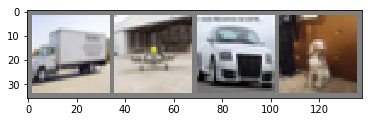

truck plane   car   dog


In [143]:
import matplotlib.pyplot as plt
import numpy as np
#定义显示图像的函数
def imshow(img):
    img = img / 2 + 0.5 #还原上面对图片进行的正则化处理，即还原到原来模样才能正常显示
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))#用像素值画图（像素值的可视化），详见https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html
    #调用np.transpose()进行转置解决Invalid dimensions for image data图像尺寸的问题
    plt.show()

dataiter = iter(trainloader)#用iter()函数获取trainloader这个可迭代对象的迭代器
images, labels = dataiter.next()#⽤next()函数来获取迭代器中的下⼀条数据，trainloader每一条数据包含图片和标签
#iter()和next()函数详见https://blog.csdn.net/xun527/article/details/76652189
imshow(torchvision.utils.make_grid(images))#调用imshow函数打印图片。torchvision.utils.make_grid()的作用是将若干幅图像拼成一幅图像，详见https://blog.csdn.net/u012343179/article/details/83007296
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))#打印标签。这里是4的原因是前面batch_size设为4，即每一批的数据有四个


## 4.2 定义卷积神经网络

In [149]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):#定义每层怎么连接
        super(Net, self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    
    def forward(self,x):#定义每层怎么运算、处理数据
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

net=Net() 
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 4.3 定义损失函数和更新参数方法（优化器）

In [150]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()#使用交叉熵损失函数
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)#使用动量梯度下降法

## 4.4 训练网络（反向传播）

In [155]:
for epoch in range(2):#在整个数据集上循环训练两次
    running_loss=0.0#设定初始损失为0
    for i,data in enumerate(trainloader,0):#i：新设的索引值，在括号内设成了从0开始。data：trainloader里面的数据。
        #enumerate()用法：https://blog.csdn.net/churximi/article/details/51648388
        inputs,labels=data#依次每个训练批次的数据
        optimizer.zero_grad()#梯度清零
        
        outputs=net(inputs)#向前传播
        loss=criterion(outputs,labels)#计算损失
        loss.backward()#向后传播，这里backward()不需要参数是因为loss是一个数，是标量
        optimizer.step()#更新参数
        
        running_loss+=loss.item()#累加误差。因为loss是tensor数据类型，需要.item()将tensor数据类型转化为python数字类型
        if i%2000==1999:#每2000批计算一次平均误差。%：取余运算
            print('[{},{:5d}]loss:{:.3f}'.format(epoch+1,i+1,running_loss/2000))#格式化的一些表示方法（{.f},{.d}之类的）见http://www.runoob.com/python/att-string-format.html
            running_loss=0.0
print('Finish training')
    

[1, 2000]loss:1.755
[1, 4000]loss:1.649
[1, 6000]loss:1.574
[1, 8000]loss:1.536
[1,10000]loss:1.467
[1,12000]loss:1.439
[2, 2000]loss:1.362
[2, 4000]loss:1.356
[2, 6000]loss:1.335
[2, 8000]loss:1.304
[2,10000]loss:1.306
[2,12000]loss:1.264
Finish training


## 4.5 测试网络（用测试集）

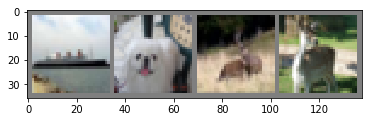

GroundTruth:   ship   dog  deer  deer


In [159]:
#从测试集中选取一批图像测试一下
#先显示正确的图片标签
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [186]:
#将这批图像输入网络中进行测试,输出是每张图片10个类别的值(4×10矩阵）。一个类的值越高，网络就越认为这个图像属于这个类。
outputs=net(images)
print(outputs)#每张图片10个类别的值
_,predict=torch.max(outputs,1)#从outputs的每行中记录最大的数值和序号，1表示每行，0表示每列，torch.max()详见https://pytorch.org/docs/stable/torch.html?highlight=torch%20max#torch.max
#_,的作用：去掉前面不必要的tensor，只保留索引需要的tensor。因为torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)。详见https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc
print(predict)
print(predict[0])
print('Predicted labels:',' '.join('%5s' % classes[predict[j]] for j in range(4)))
print(labels.size())

tensor([[ 4.5057,  0.7834,  0.3848, -1.9135, -0.8926, -3.7529, -3.4491, -2.1073,
          4.6019,  2.1197],
        [-0.6576,  0.3744, -0.2841,  0.3821,  0.2028,  0.4395, -1.0406,  2.3168,
         -1.5815, -0.5605],
        [-0.4038, -1.8147,  0.3657,  0.4995,  1.4068,  0.7821, -0.2575,  2.8400,
         -3.1315, -1.4054],
        [-0.1710, -2.7568,  0.9512,  1.2733,  0.5453,  1.4240, -0.5494,  1.2480,
         -0.3370, -1.4066]], grad_fn=<AddmmBackward>)
tensor([8, 7, 7, 5])
tensor(8)
Predicted labels:  ship horse horse   dog
torch.Size([4])


In [192]:
#统计总的准确率
correct=0
total=0
with torch.no_grad():#将所有requires_grad设为False，即不准备计算梯度。因为这里只要统计预测准确率，没有再反向传播，所以设为False，节省空间。
    for data in testloader:#每一个test mini-batch（测试批次）
        images,labels=data
        print(labels)#labels是每个类别对应的序号
        outputs=net(images)
        _,predict=torch.max(outputs,1)
        print(predict==labels)#predict==labels是判断语句，输出值是0和1，对应位置相等（判断正确）就是1，不对就是0
        total+=labels.size(0)#labels.size()出来不是数字类型，是torch.Size([4])（见上一格），所以加个0索引第一个数4
        correct+=(predict==labels).sum().item()#求和后.item()转换为数字类型
print('Accuracy:',correct/total)
    

tensor([2, 9, 7, 3])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([4, 6, 2, 7])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([6, 3, 0, 3])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([2, 4, 6, 8])
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor([9, 9, 6, 2])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([1, 1, 8, 3])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([7, 2, 4, 0])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([1, 0, 0, 5])
tensor([1, 1, 0, 0], dtype=torch.uint8)
tensor([9, 6, 0, 0])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([5, 5, 6, 1])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([9, 0, 9, 5])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([1, 3, 5, 8])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([9, 6, 7, 1])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([0, 8, 0, 5])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([6, 8, 7, 8])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([1, 0, 6, 2])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([0, 3, 3, 6])
ten

tensor([5, 9, 0, 3])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([0, 4, 7, 7])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([3, 1, 8, 0])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([9, 0, 3, 0])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([3, 6, 7, 1])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([5, 4, 3, 0])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([7, 8, 9, 3])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([4, 8, 2, 2])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([5, 9, 3, 7])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([8, 0, 9, 0])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([4, 9, 1, 9])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([6, 0, 2, 6])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([1, 7, 5, 2])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([0, 7, 0, 7])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([6, 4, 7, 6])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([1, 2, 9, 3])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([2, 8, 2, 4])
ten

tensor([8, 4, 0, 0])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([0, 7, 6, 3])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([3, 3, 4, 9])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 5, 4, 9])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([0, 2, 8, 4])
tensor([1, 1, 0, 0], dtype=torch.uint8)
tensor([3, 6, 8, 3])
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor([3, 9, 3, 1])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([0, 5, 4, 0])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([8, 1, 8, 8])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([5, 3, 5, 2])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([4, 2, 3, 3])
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor([7, 6, 6, 2])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([1, 5, 6, 5])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([6, 1, 2, 4])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([8, 6, 8, 4])
tensor([1, 1, 0, 0], dtype=torch.uint8)
tensor([0, 1, 8, 5])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([3, 7, 3, 8])
ten

tensor([7, 0, 1, 7])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([6, 0, 4, 3])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([9, 3, 3, 7])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([1, 2, 3, 1])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([7, 5, 7, 6])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([2, 7, 8, 4])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([2, 8, 6, 5])
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor([9, 1, 9, 0])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([6, 4, 3, 2])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([4, 9, 2, 3])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([5, 0, 6, 2])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([2, 5, 6, 1])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([6, 5, 8, 0])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 9, 2, 2])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 4, 3, 9])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([0, 3, 7, 2])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([4, 5, 0, 9])
ten

tensor([6, 3, 3, 7])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([5, 5, 0, 8])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([5, 8, 8, 1])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([5, 2, 2, 5])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([9, 2, 4, 9])
tensor([1, 1, 0, 0], dtype=torch.uint8)
tensor([8, 9, 6, 9])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([2, 7, 8, 6])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([9, 6, 7, 7])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([2, 1, 0, 7])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([7, 2, 4, 4])
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor([8, 3, 1, 5])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([8, 9, 2, 6])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([1, 4, 5, 9])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([5, 1, 8, 2])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 4, 7, 6])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([3, 6, 7, 5])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([1, 3, 7, 7])
ten

tensor([9, 5, 7, 2])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([7, 5, 5, 9])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([6, 8, 8, 1])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([1, 3, 8, 4])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([6, 6, 4, 7])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([3, 1, 5, 6])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([8, 9, 0, 9])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([1, 5, 0, 7])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([3, 3, 1, 6])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([4, 9, 0, 7])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([8, 2, 0, 9])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([2, 6, 6, 6])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([7, 3, 1, 6])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([4, 5, 3, 1])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([6, 7, 4, 6])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([7, 2, 1, 6])
tensor([1, 1, 0, 0], dtype=torch.uint8)
tensor([7, 5, 9, 4])
ten

tensor([0, 3, 8, 4])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([0, 9, 0, 5])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([2, 3, 0, 1])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([3, 7, 8, 8])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([6, 8, 4, 6])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([1, 5, 4, 0])
tensor([1, 1, 0, 1], dtype=torch.uint8)
tensor([6, 1, 5, 3])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([2, 3, 4, 9])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([4, 1, 1, 0])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([1, 4, 2, 0])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([2, 0, 3, 4])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([4, 1, 8, 6])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([2, 3, 6, 5])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([8, 4, 2, 4])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([9, 4, 1, 4])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([4, 1, 6, 3])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([2, 7, 1, 6])
ten

tensor([6, 7, 3, 5])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([8, 5, 9, 9])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([4, 6, 3, 2])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([7, 7, 2, 5])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([2, 5, 0, 2])
tensor([1, 0, 1, 0], dtype=torch.uint8)
tensor([8, 1, 5, 6])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([9, 4, 0, 0])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([1, 2, 8, 3])
tensor([0, 0, 1, 0], dtype=torch.uint8)
tensor([6, 0, 9, 9])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([2, 5, 1, 2])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([2, 3, 3, 5])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([4, 8, 4, 6])
tensor([0, 0, 0, 1], dtype=torch.uint8)
tensor([8, 4, 0, 7])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([5, 0, 5, 1])
tensor([0, 1, 0, 0], dtype=torch.uint8)
tensor([2, 3, 3, 1])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([7, 4, 9, 9])
tensor([1, 0, 1, 1], dtype=torch.uint8)
tensor([3, 0, 6, 0])
ten

tensor([3, 9, 2, 3])
tensor([1, 1, 1, 0], dtype=torch.uint8)
tensor([5, 0, 5, 0])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([9, 9, 8, 8])
tensor([0, 1, 1, 0], dtype=torch.uint8)
tensor([5, 8, 9, 6])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([8, 5, 1, 0])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 5, 1, 5])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([8, 4, 5, 4])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([2, 5, 5, 7])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 5, 0, 8])
tensor([1, 0, 0, 0], dtype=torch.uint8)
tensor([2, 6, 6, 6])
tensor([1, 1, 1, 1], dtype=torch.uint8)
tensor([1, 2, 1, 4])
tensor([0, 0, 0, 0], dtype=torch.uint8)
tensor([7, 7, 7, 3])
tensor([0, 1, 1, 1], dtype=torch.uint8)
tensor([7, 2, 5, 3])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([5, 0, 5, 1])
tensor([0, 0, 1, 1], dtype=torch.uint8)
tensor([7, 7, 5, 0])
tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([5, 1, 4, 8])
tensor([0, 1, 0, 1], dtype=torch.uint8)
tensor([1, 5, 4, 2])
ten

In [188]:
class_correct = list(0. for i in range(10))
print(class_correct)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [201]:
#查看每一类的预测效果
class_correct=list(0. for i in range(10))#创建一个包含10个0的列表用来容纳后面各个类别正确的个数。有多个类别，装进list然后用list[i]去弄的思想要借鉴。
class_total=list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predict=torch.max(outputs,1)
        c=(predict==labels).squeeze()#squeeze()：去掉维数为1的维度，详见https://blog.csdn.net/xiexu911/article/details/80820028
        for i in range(4):
            label=labels[i]
            class_correct[label]+=c[i].item()
            class_total[label]+=1
for i in range(10):
    print('Accuracy of {:.5s}:{:.3f}'.format(classes[i],class_correct[i]/class_total[i]))
            

Accuracy of plane:0.661
Accuracy of car:0.601
Accuracy of bird:0.522
Accuracy of cat:0.470
Accuracy of deer:0.341
Accuracy of dog:0.305
Accuracy of frog:0.695
Accuracy of horse:0.712
Accuracy of ship:0.515
Accuracy of truck:0.592


## 4.6 在GPU上训练

In [203]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')#如果存在GPU（cuda），则用GPU，没有就用cpu
print(device)

cuda:0


In [209]:
net.to(device)#.to(device)：将神经网络转移到设定的device（GPU）上

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [214]:
inputs,images=inputs.to(device),labels.to(device)#不要忘记将输入和标签这些也转移到GPU上